In [7]:
import cv2
from matplotlib import pyplot as plt
from skimage import exposure,util
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport
sns.set(color_codes=True)

df = pd.read_pickle("C:/Users/juanr/Documents/data_mediciones/defects/defectsholesAZUL_df.pkl")
df.info(),df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1
Data columns (total 5 columns):
equivalent_diameter    1517 non-null float64
perimeter              1517 non-null float64
area                   1517 non-null float64
extent                 1517 non-null float64
img                    1517 non-null int64
dtypes: float64(4), int64(1)
memory usage: 71.1 KB


(None, (1517, 5))

In [10]:
profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [3]:
profile

In [8]:
df.describe()

,equivalent_diameter,perimeter,area,extent,img
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,6.294754,42.203253,35.780414,0.111389,92.264997
std,2.436601,34.792177,44.108030,0.026645,29.578542
min,4.533166,13.176375,16.139612,0.046083,3.000000
25%,4.903814,25.260469,18.886780,0.092777,78.000000
50%,5.492590,31.203760,23.694324,0.108504,84.000000
75%,6.678098,44.782302,35.026392,0.126091,125.000000
max,33.910215,393.238767,903.131480,0.288207,161.000000


In [12]:
df['equivalent_diameter'].max()

33.910215487831884

In [13]:
df.describe()

,equivalent_diameter,perimeter,area,extent,img
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,6.294754,42.203253,35.780414,0.111389,92.264997
std,2.436601,34.792177,44.108030,0.026645,29.578542
min,4.533166,13.176375,16.139612,0.046083,3.000000
25%,4.903814,25.260469,18.886780,0.092777,78.000000
50%,5.492590,31.203760,23.694324,0.108504,84.000000
75%,6.678098,44.782302,35.026392,0.126091,125.000000
max,33.910215,393.238767,903.131480,0.288207,161.000000


In [21]:
imgs = df.groupby('img').apply(lambda group: group.iloc[0:])
imgs.tail()

equivalent_diameter  perimeter       area    extent  img
img                                                             
135 31             5.206532  34.355666  21.290552  0.069577  135
    32             5.412402  26.151666  23.007532  0.176981  135
    33             4.992178  26.938750  19.573572  0.122335  135
161 0              5.035779  22.129385  19.916968  0.150886  161
    1              5.035779  22.372114  19.916968  0.120709  161

In [16]:
imgs['equivalent_diameter'].max()

33.910215487831884

In [17]:
imgs.idxmax(axis=0)

equivalent_diameter      (15, 0)
perimeter              (84, 156)
area                     (15, 0)
extent                   (16, 0)
img                     (161, 0)
dtype: object

In [8]:
imgs['equivalent_diameter'].max(level=0)

img
0       8.697125
1       5.987694
2      11.084238
3       8.071343
4      11.279742
         ...    
156     8.205651
157     7.989675
158    11.044722
159     7.363148
160     7.303526
Name: equivalent_diameter, Length: 161, dtype: float64

(0, 100)

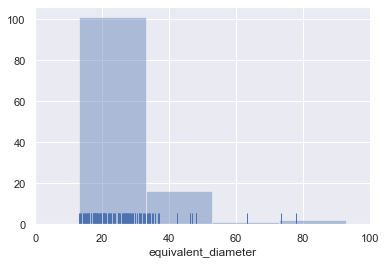

In [56]:
x = imgs['equivalent_diameter'].max(level=0)
sns.distplot(x,kde=False,rug=True);
plt.xlim(0,100)

In [53]:
imgs.loc[1]

,area,convex_area,filled_area,major_axis_length,minor_axis_length,perimeter,equivalent_diameter,extent,img
1,107.139552,114.694264,107.139552,13.728021,10.119715,41.672041,11.679654,0.258791,1
2,34.339600,35.369788,34.339600,7.112841,6.180955,21.179291,6.612302,0.283798,1
3,7.898108,8.584900,7.898108,4.211862,2.428861,9.740094,3.171149,0.282075,1
4,652.452400,686.792000,652.452400,30.423954,27.475507,102.203769,28.822356,0.241649,1
5,25.411304,27.815076,25.411304,6.003789,5.446449,18.977479,5.688117,0.254113,1
6,6.181128,6.867920,6.181128,3.343461,2.354079,8.002917,2.805362,0.247245,1
7,20.603760,21.977344,20.603760,5.737270,4.712450,16.692375,5.121867,0.286163,1
8,115.381056,122.935768,115.381056,13.119170,11.348972,41.086041,12.120550,0.262230,1


In [50]:
data_list = []
for i in range(122):
    data_list.append(imgs.loc[i].describe())

             area  convex_area  filled_area  major_axis_length  \
count  101.000000   101.000000   101.000000         101.000000   
mean    21.582949    23.741923    21.582949           4.750542   
std     48.017994    52.715011    48.017994           4.296018   
min      0.343396     0.343396     0.343396           0.000000   
25%      2.060376     2.060376     2.060376           2.139769   
50%      5.837732     6.524524     5.837732           3.284947   
75%     14.079236    15.109424    14.079236           5.425017   
max    271.969632   294.977164   271.969632          23.371460   

       minor_axis_length   perimeter  equivalent_diameter      extent    img  
count         101.000000  101.000000           101.000000  101.000000  101.0  
mean            3.181374   12.521005             3.852168    0.254727    0.0  
std             3.287748   14.424155             3.573161    0.050131    0.0  
min             0.000000    0.000000             0.661230    0.147851    0.0  
25%       

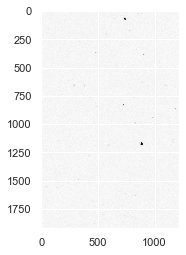

In [51]:
print(data_list[0])
img = cv2.imread('C:/Users/juanr/Documents/mediciones_ZEISS/bandas/Bandanorm/norm_3.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = util.img_as_ubyte(gray)
plt.imshow(gray,cmap='gray')

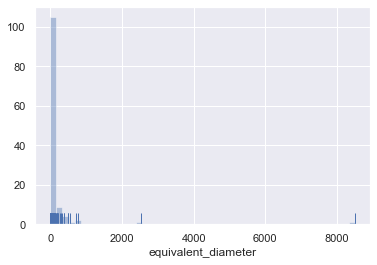

In [41]:
x = imgs['equivalent_diameter'].count(level=0)
sns.distplot(x,kde=False,rug=True);
#plt.xlim(10,3000)

In [27]:
np.max(imgs['equivalent_diameter'].mean(level=0))

1008.9748743793892

In [19]:
imgs.loc[0].max()

area                   271.969632
convex_area            294.977164
filled_area            271.969632
major_axis_length       23.371460
minor_axis_length       15.908802
perimeter               72.234478
equivalent_diameter     18.608667
extent                   0.343396
img                      0.000000
dtype: float64

In [125]:
imgs.iloc[0,1]

17.513196

In [48]:
imgs

[(0,
       label           area    convex_area    filled_area  major_axis_length  \
  0       10  796630.301164  799581.102992  799581.102992        1297.923978   
  1       11      17.513196      18.543384      17.513196           5.425017   
  2       12       3.433960       3.433960       3.433960           2.344000   
  3       13      25.754700      28.158472      25.754700           8.573289   
  4       14       2.060376       2.060376       2.060376           2.841901   
  ..     ...            ...            ...            ...                ...   
  97     107       5.150940       5.494336       5.150940           3.078824   
  98     108       4.807544       5.494336       4.807544           3.229321   
  99     109      89.626356      99.928236      89.626356          13.025072   
  100    110       6.181128       6.524524       6.181128           3.495906   
  101    111       5.150940       5.494336       5.150940           3.205931   
  
       minor_axis_length    peri

In [45]:
imgs =[] 
for img in df.groupby('img'): 
    imgs.append(img)

In [46]:
imgs[0]

(0,
      label           area    convex_area    filled_area  major_axis_length  \
 0       10  796630.301164  799581.102992  799581.102992        1297.923978   
 1       11      17.513196      18.543384      17.513196           5.425017   
 2       12       3.433960       3.433960       3.433960           2.344000   
 3       13      25.754700      28.158472      25.754700           8.573289   
 4       14       2.060376       2.060376       2.060376           2.841901   
 ..     ...            ...            ...            ...                ...   
 97     107       5.150940       5.494336       5.150940           3.078824   
 98     108       4.807544       5.494336       4.807544           3.229321   
 99     109      89.626356      99.928236      89.626356          13.025072   
 100    110       6.181128       6.524524       6.181128           3.495906   
 101    111       5.150940       5.494336       5.150940           3.205931   
 
      minor_axis_length    perimeter  equivale

In [7]:
vsls[0]

,label,area,convex_area,filled_area,major_axis_length,minor_axis_length,perimeter,equivalent_diameter,extent,img
0,10,796630.301164,799581.102992,799581.102992,1297.923978,820.857221,5600.580229,1007.125217,0.342129,0
0,10,798469.186744,799581.102992,799581.102992,1297.760780,821.783329,3982.974225,1008.286935,0.342918,1
0,10,797418.051588,799581.102992,799171.431564,1297.215731,821.227875,4867.028263,1007.623043,0.342467,2
0,10,796601.112504,799581.102992,799488.729468,1296.329499,821.871459,5026.452417,1007.106766,0.342116,3
0,10,797064.010312,799581.102992,799547.793580,1298.032597,821.351387,5345.484557,1007.399334,0.342315,4
...,...,...,...,...,...,...,...,...,...,...
0,10,797419.425172,799581.102992,799581.102992,1297.853127,821.386990,5047.815541,1007.623911,0.342468,118
0,10,795017.713548,799581.102992,799498.687952,1298.561023,821.364740,7149.287495,1006.105358,0.341436,119
0,10,788919.000588,799581.102992,799435.846484,1299.766102,823.120122,10523.869414,1002.238928,0.338817,120
0,10,795895.433724,799581.102992,799581.102992,1297.487588,821.253696,6106.218003,1006.660588,0.341813,121


In [ ]:
for img in range(len(imgs_df)):
    df[img] = imgs_df.get_group(img)

In [ ]:
for groups in imgs_df:
    df[]

#imgs_df.get_group('img_0')

In [2]:
#df = df.set_index('img')
#df.sort_values('column_name',ascending=True)
#imgs = df.groupby(by=['img'])
#for img,imgs in imgs_df:
#    print(img)
#    print(imgs_df.head())

#to plot one against the other:
#sns.pairplot(df, hue='equivalent_diameter');